<a href="https://colab.research.google.com/github/ramram9/Tutorial/blob/testbranch/basic_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

# Tensor

In [ ]:
#텐서 초기화

#데이터로 부터 직접 생성
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
x_data.dtype

torch.int64

In [ ]:
#넘파이 배열로부터 생성하기
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [ ]:
#다른 텐서로부터 생성하기
#명시적으로 override하지 않는다면 인자로 주어진 텐서의 (shape, datatype)유지
x_ones = torch.ones_like(x_data) #x_data의 속성 유지
x_rand = torch.rand_like(x_data, dtype=float) #x_data의 속성 덮어쓰기
print(f'ones tensor:\n {x_ones}\n')
print(f'random tensor:\n {x_rand}\n')

ones tensor:
 tensor([[1, 1],
        [1, 1]])

random tensor:
 tensor([[0.9672, 0.0500],
        [0.9051, 0.9773]], dtype=torch.float64)



 torch.ones_like 함수는 입력 텐서의 크기, 데이터 타입 등 속성을 그대로 유지하지만, 데이터는 복사하지 않고 값이 모두 1인 텐서를 새로 만듭니다.

 torch.rand_like 함수는 기본적으로 float32 타입의 텐서를 생성 (int64 데이터 타입을 지원하지않음 명시적으로 float라고 지정해줘야 변환을 한다네)

In [ ]:
#random or constant 값 사용하기
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f'random tensor: \n{rand_tensor} \n')
print(f'radom tensor: \n {ones_tensor} \n')
print(f'random tensor: \n {zeros_tensor} \n')

random tensor: 
tensor([[0.0067, 0.9288, 0.9433],
        [0.8019, 0.7802, 0.3844]]) 

radom tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

random tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [ ]:
#텐서의 속성
tensor = torch.rand(3,4)
print(f'shape of tensor: {tensor.shape}')
print(f'datatype of tensor: {tensor.dtype}')
print(f'devixe tensor is stored on: {tensor.device}')

shape of tensor: torch.Size([3, 4])
datatype of tensor: torch.float32
devixe tensor is stored on: cpu


In [ ]:
#tensor operation
tensor = torch.ones(4,4)
print(f'first row: {tensor[0]}')
print(f'firrst column: {tensor[:,0]}')
tensor[:,-1] =2
print(f'last column: {tensor[...,-1]}')


first row: tensor([1., 1., 1., 1.])
firrst column: tensor([1., 1., 1., 1.])
last column: tensor([2., 2., 2., 2.])


tensor[:, -1]->:는 모든 행을 의미하고, -1은 마지막 열을 의미 (2차원 텐서에서만 사용)

tensor[..., -1]-> ...는 모든 차원을 의미하고, -1은 마지막 축의 마지막 요소를 의미, ...는 여러 차원에서 동작하기 때문에, 3차원 이상 텐서에서도 동일한 방식으로 사용

In [ ]:
#텐서 합치기
t1 = torch.cat([tensor, tensor, tensor], dim=-1)
print(t1)

tensor([[1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2.],
        [1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2.],
        [1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2.],
        [1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2.]])


dim=1 -->두번째 차원(열)을 따라 연결했음을 의미한다.

지정하지않으면 dim=0 첫번재 차원인 행을 따라서 연결한다.
-1은 마지막 차원 -2는 마지막에서 두번재 차원을 의미



In [ ]:
#(tensor joining operator) torch.stack(tensors, dim=0, *, out=None)->Tensor
x = torch.randn(2, 3)
print(x)
x = torch.stack((x,x), dim=2)
print(x)


tensor([[-1.2788, -0.6075, -0.8422],
        [-0.9747,  0.2668,  0.1772]])
tensor([[[-1.2788, -1.2788],
         [-0.6075, -0.6075],
         [-0.8422, -0.8422]],

        [[-0.9747, -0.9747],
         [ 0.2668,  0.2668],
         [ 0.1772,  0.1772]]])


In [ ]:
#산술연산 (Arithmetic operations)
#matrix multiplication
#tensor.T = transpose matrix
tensor = torch.ones(4,4)
tensor[:,1]=0
print(tensor)
y1 = tensor @ tensor.T
print(y1)
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)

torch.matmul(tensor, tensor.T, out=y3)

#element-wise product
z1 = tensor*tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [ ]:
#single-element
agg = tensor.sum() #aggregate(집계)
agg_item = agg.item() #item()을 사용하여 숫자값으로 변환
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [ ]:
#바꿔치기 (in-place)연산 -> 연산결과를 operand(피연산자)에 저장하는 연산 _접미사를 가진다
#x.copy_(y), x.t_() 는 x를 변경한다.
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


바꿔치기 연산은 메모리를 일부 절약하지만, 기록(history)이 즉시 삭제되어 도함수(derivative) 계산에 문제가 발생할 수 있습니다. 따라서, 사용을 권장하지 않습니다.

In [ ]:
#Numpy 변환 (Bridge)
#CPU 상의 텐서와 NumPy 배열은 메모리 공간을 공유하기 때문에, 하나를 변경하면 다른 하나도 변경됩니다.

#텐서를 numpy 배열로 변환하기
t = torch.ones(5)
print(f't: {t}')
n = t.numpy()
print(f'n: {n}')

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
#NumPy 배열의 변경 사항이 텐서에 반영됩니다.
t.add_(1)
print(f't: {t}')
print(f'n: {n}')

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


# DATASET과 DATALOADER

PyTorch는 torch.utils.data.DataLoader 와 torch.utils.data.Dataset 의 두 가지 데이터 기본 요소를 제공하여 미리 준비해둔(pre-loaded) 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 합니다.

Dataset 은 샘플과 정답(label)을 저장하고, DataLoader 는 Dataset 을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감쌉니다.

In [ ]:

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#데이터 셋 불러오기
training_data = datasets.FashionMNIST(
    root = 'sample_data',
    train = True,
    download = True, #root에 데이터가 없는 경우 , 인터넷에서 다운로드
    transform = ToTensor() #변환기 생성 이미지 데이터를 PyTorch 텐서로 변환
)
#transform -> feature을 변환  target_transformdm->label을 변환

test_data = datasets.FashionMNIST(
    root = 'sample_data',
    train = False,
    download = True,
    transform = ToTensor()
)


100%|██████████| 26421880/26421880 [00:01<00:00, 17932314.21it/s]


Extracting sample_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to sample_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 339602.29it/s]


Extracting sample_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to sample_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5549407.41it/s]


Extracting sample_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to sample_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5928686.71it/s]

Extracting sample_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to sample_data/FashionMNIST/raw



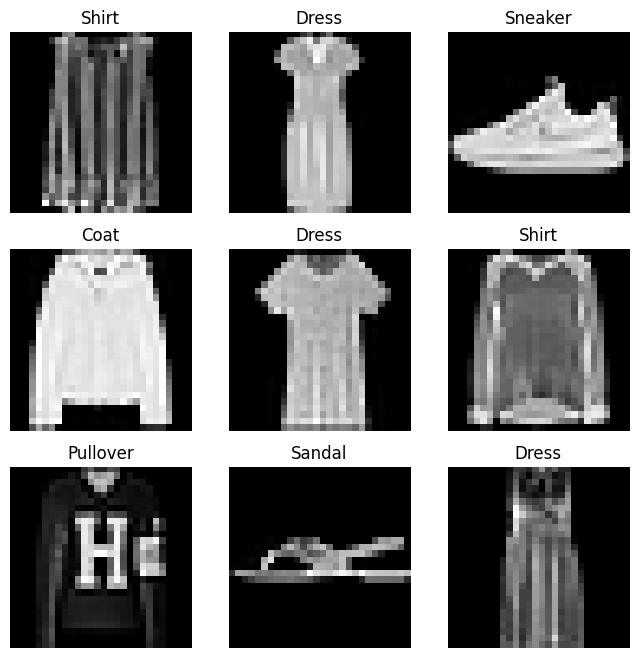

In [ ]:
#데이터셋을 순회하고 시각화하기
#training_data[index]. matplotlib 을 사용하여 학습 데이터의 일부를 시각화

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows =3,3
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item() #0에서 len(training_data) - 1 사이의 랜덤 정수를 생성
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')

plt.show()

In [ ]:
#파일에서 사용자 정의 데이터 셋 만들기
#사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 합니다: __init__, __len__, and __getitem__.
#이미지 = img_dir 디렉토리에 저장
#정답은 annotations_file csv 파일에 별도로 저장

import os
import pandas as pd
from torchvision.io import read_image

#__init__ 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행됩니다.
#여기서는 이미지와 주석 파일(annotation_file)이 포함된 디렉토리와 (다음 장에서 자세히 살펴볼) 두가지 변형(transform)을 초기화합니다.
class CustomImageDataset(Dataset):
  def __init__(self, annotation_file,img_dirm, transform=None, target_transform=None)
      self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
      self.img_dir = img_dir
      self.transform = transform
      self.target_transform = training_transform

#__len__ 함수는 데이터셋의 샘플 개수를 반환합니다.
  def __len__(self, img_lables)
      return len(self.img_labels)

  def __getitem__(self, idx):
      img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
      image = read_image(img_path)
      label = self.img_dir.iloc

df.iloc[행의 위치, 열의 위치]
.iloc는 pandas 라이브러리에서 DataFrame 및 Series의 행과 열을 정수 기반의 위치로 선택할 수 있게 해주는 인덱서

.iloc를 사용하면 행과 열의 정수 위치를 사용하여 데이터를 선택, 필터링, 수정할 수 있습니다.
